## Load and Display Images

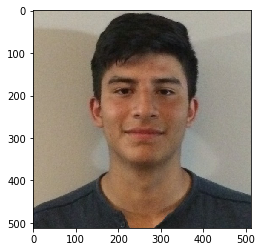

In [1]:
import imageio
import matplotlib.pyplot as plt

# load color headshot photo
headshot_rgb = imageio.imread('../images/portrait_josiah.jpg')
plt.imshow(headshot_rgb)

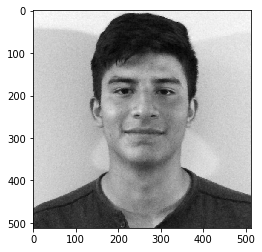

In [2]:
import numpy as np

# convert photo grayscale
headshot_gray = np.dot(headshot_rgb[...,:3], [0.2989, 0.5870, 0.1140])
plt.imshow(headshot_gray, cmap=plt.get_cmap('gray'))

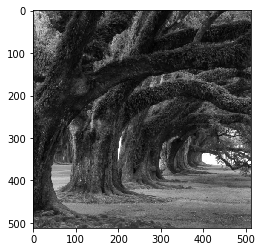

In [3]:
# load trees photo
trees_gray = imageio.imread('../images/trees.jpg')
plt.imshow(trees_gray, cmap=plt.get_cmap('gray'))

In [4]:
# for convenience store in results in dictionary
headshots = {
    'rgb': headshot_rgb,
    'gray': headshot_gray, 
}
trees = {
    'gray': trees_gray
}

## Apply Fourier transform

In [5]:
# apply Fourier transform to headshot photo
headshot_ft = np.fft.rfft2(headshots['gray'])

# get amplitudes and phases of headshot Fourier transform
headshots['amplitude'] = np.absolute(headshot_ft)
headshots['phase'] = np.angle(headshot_ft)


# apply Fourier transform to trees photo
trees_ft = np.fft.rfft2(trees['gray'])

# get amplitude and phases of trees Fourier transform
trees['amplitude'] = np.absolute(trees_ft)
trees['phase'] = np.angle(trees_ft)

In [6]:
# a function that converts polar coordinates (amplitude, phase) to rectangular coordinates (x, y)
def polar_to_rect(amplitude, phase):
    return amplitude * np.exp(1j * phase)

#### Shuffle and combine amplitude and phase

In [7]:
# headshot amplitude and trees phase
headshot_amp_trees_phase = polar_to_rect(headshots['amplitude'], trees['phase'])

# trees amplitude and headshot phase
trees_amp_headshot_phase = polar_to_rect(trees['amplitude'], headshots['phase'])

#### Get new images

In [8]:
headshot_amp_trees_phase_image = np.fft.irfft2(headshot_amp_trees_phase)
trees_amp_headshot_phase_image = np.fft.irfft2(trees_amp_headshot_phase)

## New images

### Headshot amplitude and trees phase

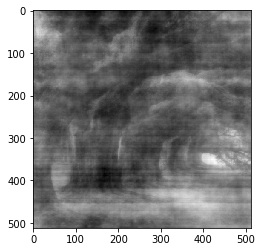

In [9]:
plt.imshow(headshot_amp_trees_phase_image, cmap=plt.get_cmap('gray'))

### Trees amplitude and headshot phase

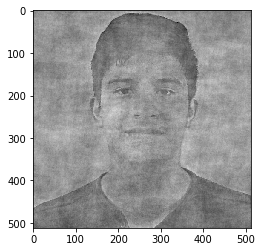

In [10]:
plt.imshow(trees_amp_headshot_phase_image, cmap=plt.get_cmap('gray'))

## Part b answer: It contains the phases from the original image. 